In [1]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
train_images = np.load("<path>")
train_labels = np.load("<path>")

#### Scale data before doing PCA

In [3]:
scaled = StandardScaler().fit_transform(np.concatenate(train_images).reshape(len(train_images), 128 * 128))

#### Perform PCA

In [4]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

In [5]:
principalDf = pd.DataFrame(data=components, columns=['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,28.572536,39.163960
1,1.032932,-14.429245
2,-14.435251,-5.895805
3,24.609234,-28.028551
4,12.170010,-4.842598


#### Concat PCA components with labels

In [6]:
finalDf = pd.concat([principalDf, pd.DataFrame(data=train_labels, columns=['label'])], axis = 1)
finalDf.head()

,pc1,pc2,label
0,28.572536,39.163960,41426
1,1.032932,-14.429245,41683
2,-14.435251,-5.895805,41431
3,24.609234,-28.028551,41392
4,12.170010,-4.842598,41651


### Visualize 

In [7]:
def visualize_pca(targets, pcaDf, colors=['r','g','b'], label_col='label', pc1_col='pc1', pc2_col='pc2'):
    
    if (len(targets) != len(colors)):
        raise ValueError("Colors and targets list must be the same length")
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for target, color in zip(targets,colors):
        indicesToKeep = pcaDf['label'] == target
        ax.scatter(pcaDf.loc[indicesToKeep, 'pc1']
                   , pcaDf.loc[indicesToKeep, 'pc2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    return ax.grid()

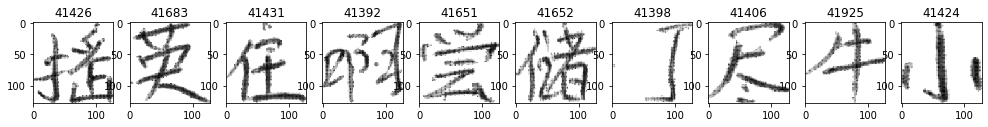

In [8]:
f, axarr = plt.subplots(1, 10,figsize=(17, 17))
for i in range(10): # since there are only 10 classes
    axarr[i].imshow(train_images[i], cmap='gray')
    axarr[i].set_title(train_labels[i])

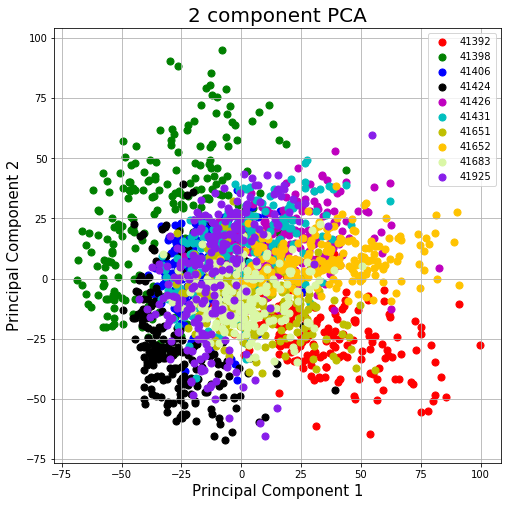

In [9]:
visualize_pca(np.unique(train_labels), finalDf, colors=['r', 'g', 'b', 'k', 'm', 'c', 'y', '#FFC300', '#DAF7A6', '#881EEA'])